In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dataset\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [6]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

# #1 Total number of records in the dataset
### INSIGHT: There are total of 1020 dengue cases in the dataset record

In [7]:
dengue.value_counts()

Month      Year  Region       Dengue_Cases  Dengue_Deaths
April      2016  BARMM        109           4                1
May        2016  Region III   365           0                1
March      2020  Region V     335           5                1
                 Region VI    630           2                1
                 Region VII   2119          6                1
                                                            ..
January    2016  Region II    659           2                1
                 Region III   1976          3                1
                 Region IV-A  2993          14               1
                 Region IV-B  203           1                1
September  2020  Region XIII  28            31               1
Name: count, Length: 1020, dtype: int64

# #1a. What is the highest number of deaths in dengue according to the record?
### INSIGHT: 1651 is the highest number of deaths in dengue according to the record

1651

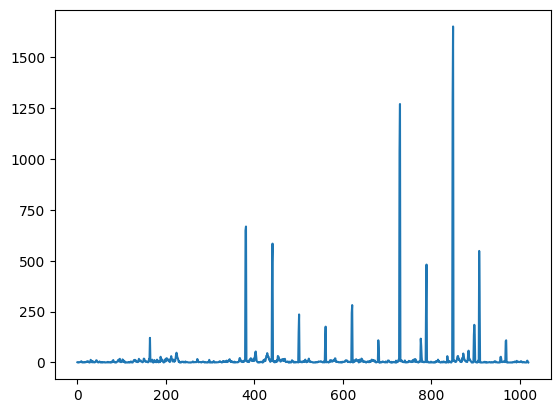

In [8]:
dengue['Dengue_Deaths'].plot()
dengue['Dengue_Deaths'].max()

# #1b. What is the highest number of cases in dengue according to the record?
### INSIGHT: 21658 is the highest number of cases in dengue according to the record

21658

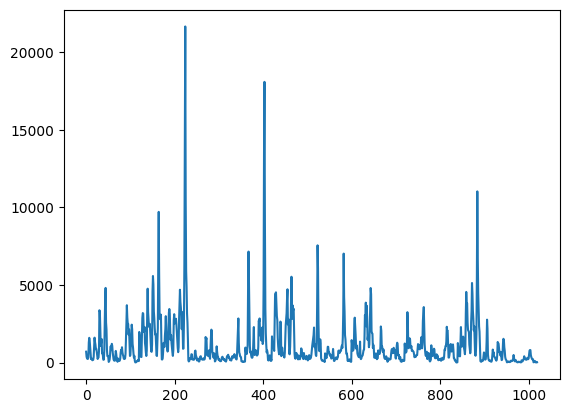

In [9]:
dengue['Dengue_Cases'].plot()
dengue['Dengue_Cases'].max()

# #1c. What year generated the most highest number of deaths in dengue according to the record?
### INSIGHT: Year 2019 generated the highest number of deaths in dengue according to the record (>20000)

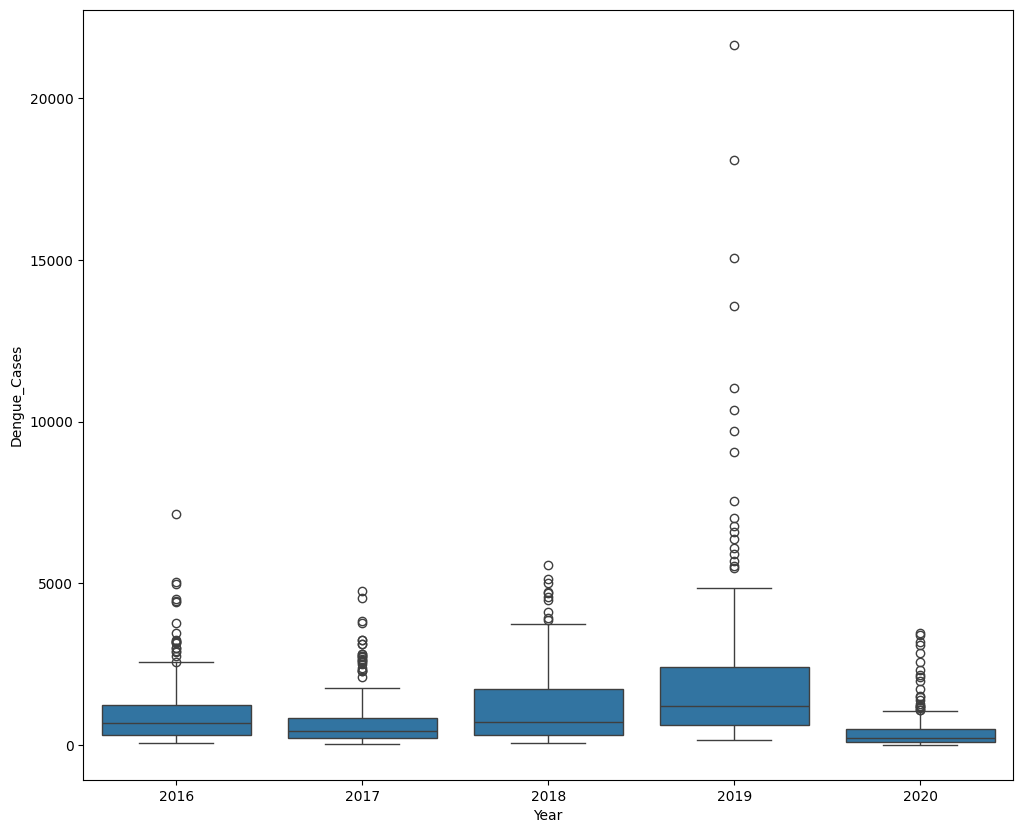

In [10]:
sns.boxplot(data=dengue,y=dengue.Dengue_Cases,x=dengue.Year)
plt.gcf().set_size_inches(12,10)

## Additional graphs related to insights

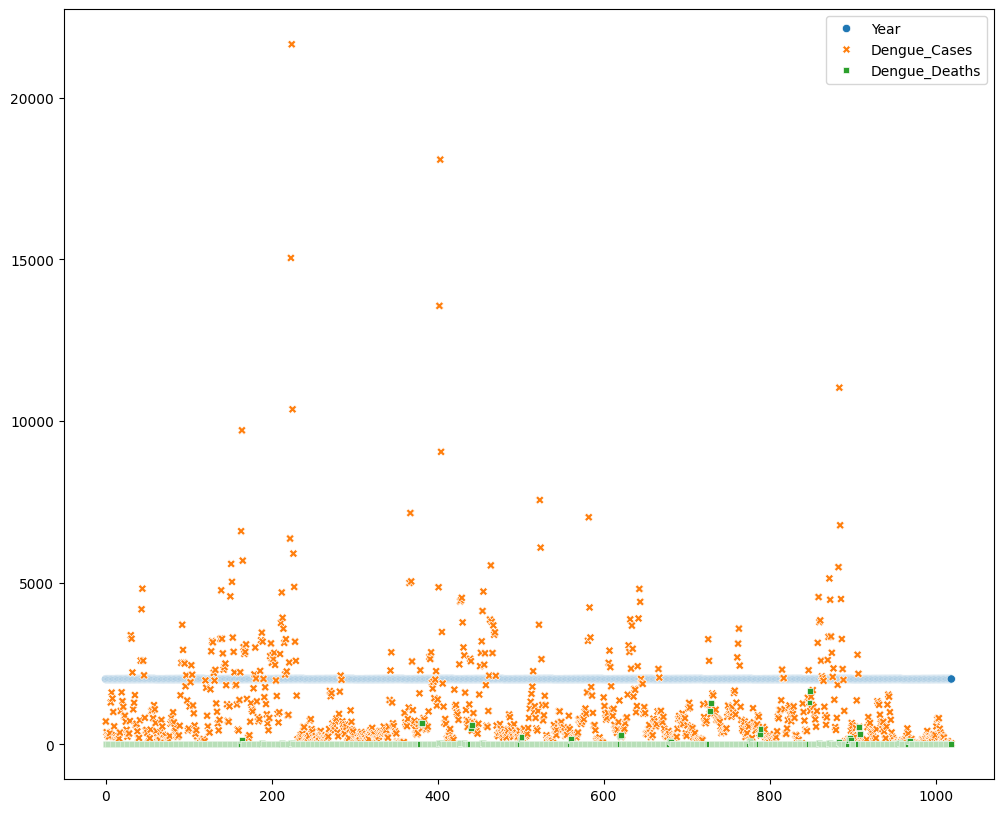

In [11]:
sns.scatterplot(data = dengue)
plt.gcf().set_size_inches(12,10)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

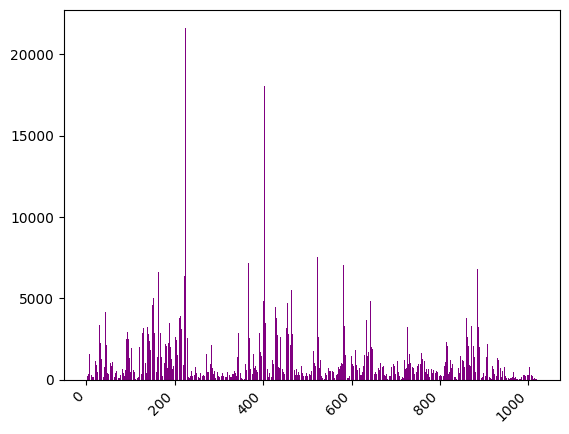

In [12]:
plt.bar(dengue['Dengue_Cases'].index,dengue['Dengue_Cases'].values, color='purple')
plt.title('')
plt.xticks(rotation=45, ha='right')

# #2 Average number of dengue cases across all records
### INSIGHT: Overall the total mean/average of dengue cases in the dataset record is 1124.93

In [13]:
np.round(dengue['Dengue_Cases'].mean(),2)

1124.93

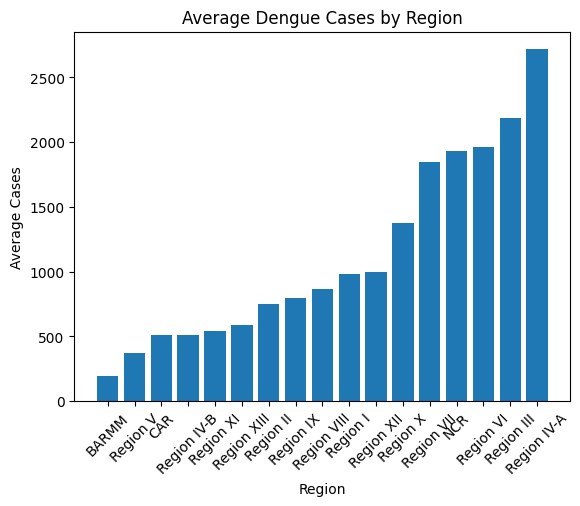

In [14]:
avg_by_region = dengue.groupby('Region')['Dengue_Cases'].mean().sort_values()
plt.bar(avg_by_region.index, avg_by_region.values)
plt.title('Average Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.show()

# #3 Maximum number of dengue deaths in a single month
### INSIGHT: The maximum number of dengue deaths in a single month is 1651

In [15]:
dengue['Dengue_Deaths'].max()

1651

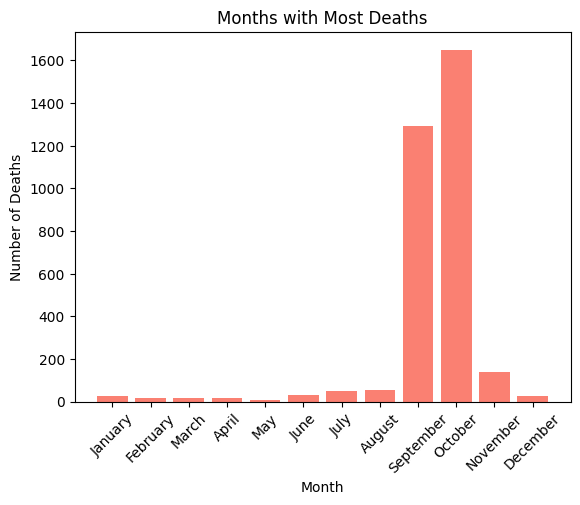

In [16]:
plt.bar(dengue['Month'], dengue['Dengue_Deaths'], color='salmon')
plt.title('Months with Most Deaths')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

# #4 Most common region in the dataset record that has the highest value of dengue deaths
### INSIGHT: The most common region in the dataset record that has the highest value of dengue deaths is NCR with a count of 1651

In [17]:
dengue.groupby(['Region'])['Dengue_Deaths'].max()

Region
BARMM           109
CAR             548
NCR            1651
Region I         13
Region II        18
Region III      121
Region IV-A      48
Region IV-B      17
Region IX       176
Region V         16
Region VI       668
Region VII      584
Region VIII     236
Region X        282
Region XI       109
Region XII     1270
Region XIII     481
Name: Dengue_Deaths, dtype: int64

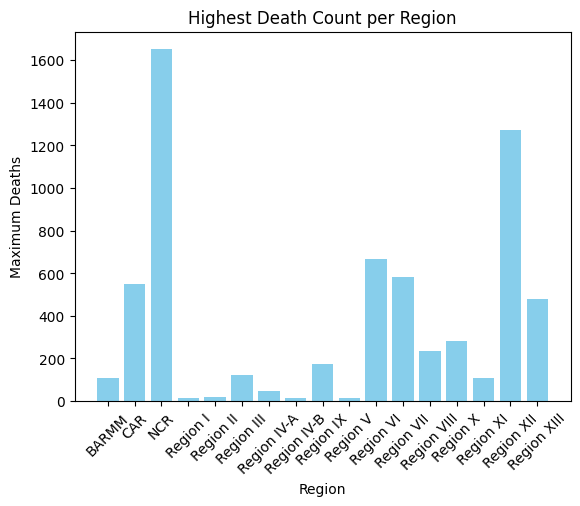

In [18]:
max_deaths = dengue.groupby('Region')['Dengue_Deaths'].max()

plt.bar(max_deaths.index, max_deaths.values, color='skyblue')
plt.title('Highest Death Count per Region')
plt.xlabel('Region')
plt.ylabel('Maximum Deaths')
plt.xticks(rotation=45)
plt.show()

# #5 Year with the most data entries
### INSIGHT: Each year has a consistent entries of 204 (>200)

In [19]:
dengue['Year'].value_counts()

Year
2016    204
2017    204
2018    204
2019    204
2020    204
Name: count, dtype: int64

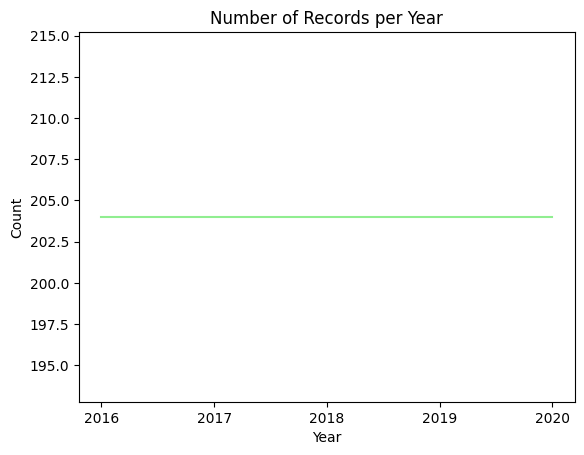

In [20]:
records_per_year = dengue['Year'].value_counts().sort_index()

plt.plot(records_per_year.index.astype(str), records_per_year.values, color='lightgreen')
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# #6 Region with the highest total dengue cases
### INSIGHT: The region with the highest total dengue cases is 'Region IV-A'

In [21]:
dengue.groupby('Region')['Dengue_Cases'].sum().idxmax()

'Region IV-A'

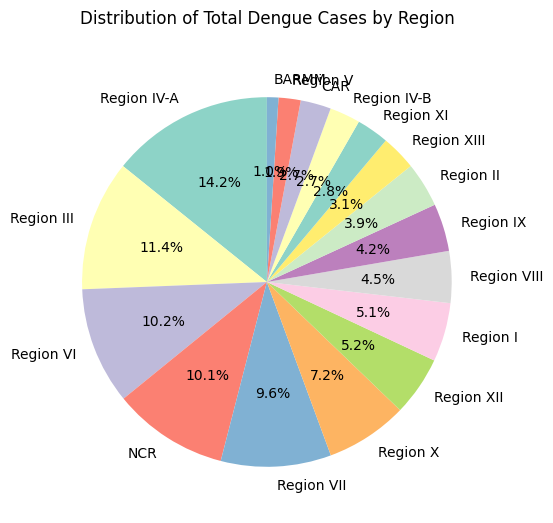

In [22]:
cases_by_region = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.pie(
    cases_by_region.values,
    labels=cases_by_region.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=sns.color_palette('Set3')
)
plt.title('Distribution of Total Dengue Cases by Region', pad=20)
plt.show()

# #7 Year with the highest total dengue deaths
### INSIGHT: Year 2016 got the highest total dengue deaths

In [23]:
dengue.groupby('Year')['Dengue_Deaths'].sum().idxmax()

2016

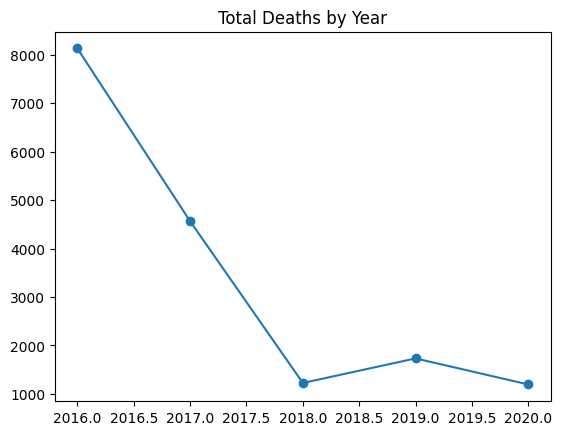

In [24]:
x = dengue.groupby('Year')['Dengue_Deaths'].sum().index
y = dengue.groupby('Year')['Dengue_Deaths'].sum().values
plt.plot(x,y, marker='o')
plt.title('Total Deaths by Year')
plt.show()

# #8 Correlation between dengue cases and deaths
### INSIGHT: There is no correlation between Dengue Cases and Dengue Deaths

In [25]:
dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])

0.03832213720419488

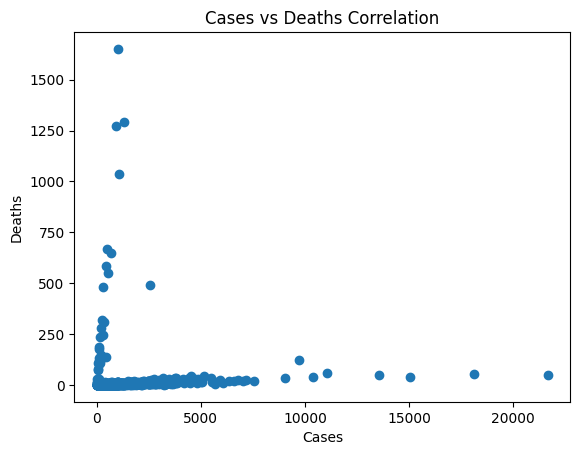

In [26]:
plt.plot(dengue['Dengue_Cases'], dengue['Dengue_Deaths'], 'o')
plt.title('Cases vs Deaths Correlation')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

# #9 Month with the highest average dengue cases
### INSIGHT: August got the highest average dengue cases (>2000)

In [27]:
dengue.groupby('Month')['Dengue_Cases'].mean().idxmax()

'August'

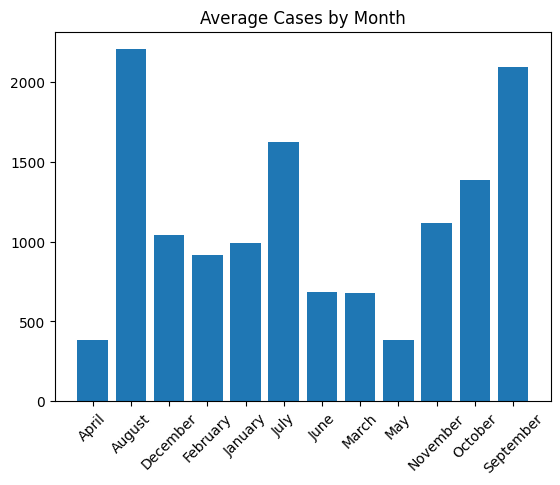

In [28]:
x = dengue.groupby('Month')['Dengue_Cases'].mean().index
y = dengue.groupby('Month')['Dengue_Cases'].mean().values
plt.bar(x,y)
plt.title('Average Cases by Month')
plt.xticks(rotation=45)
plt.show()

# #10 Region with the highest case fatality rate (deaths/cases)
### INSIGHT: The Region that got the highest case fatality rate is Region XII

In [29]:
(dengue.groupby('Region')['Dengue_Deaths'].sum() / dengue.groupby('Region')['Dengue_Cases'].sum()).idxmax()

'Region XII'

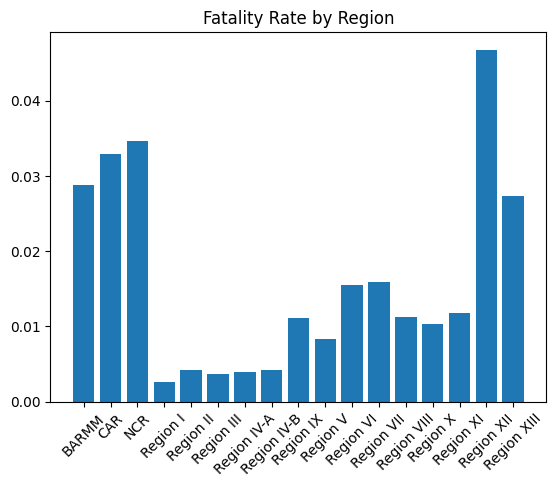

In [30]:
fatality = (dengue.groupby('Region')['Dengue_Deaths'].sum() / dengue.groupby('Region')['Dengue_Cases'].sum())
x = fatality.index
y = fatality.values
plt.bar(x,y)
plt.title('Fatality Rate by Region')
plt.xticks(rotation=45)
plt.show()

# #11 Region and year combination with the most dengue cases
### INSIGHT: The heatmap shows that in Region IV-A in the year 2019 got the most dengue cases

In [31]:
dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().idxmax()

('Region IV-A', 2019)

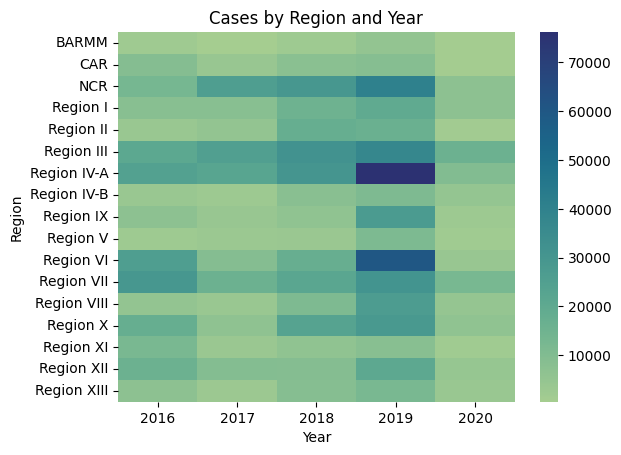

In [32]:
region_year = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
sns.heatmap(region_year, cmap='crest')
plt.title('Cases by Region and Year')
plt.show()

# #12 Monthly pattern of dengue cases by region
### INSIGHT: Region IV-A Reached the Overall Peak of Dengue Cases in the month of September

In [33]:
dengue.groupby(['Month', 'Region'])['Dengue_Cases'].mean().unstack()

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Month,,,,,,,,,,,,,,,,,
April,102.6,122.4,548.6,193.6,187.0,516.8,694.8,177.8,372.0,141.2,544.6,657.0,322.0,669.4,290.4,669.6,291.8
August,304.6,1178.6,3161.6,2336.2,1329.0,4217.4,5086.6,1170.4,1342.0,700.0,6129.6,2794.4,2011.4,2502.2,944.8,1674.2,627.8
December,140.4,325.4,2013.6,908.4,747.2,2308.8,2563.4,303.8,498.4,341.0,938.2,2515.0,722.2,1277.6,509.4,757.8,815.6
February,164.4,302.4,1692.8,419.8,671.8,1954.4,2217.2,413.6,554.6,257.6,897.8,1923.8,761.0,1025.2,509.6,893.8,900.4
January,152.4,352.8,1878.0,541.8,692.6,2289.2,2509.2,283.0,554.8,302.4,907.8,2189.8,694.2,1079.4,543.6,915.4,979.2
July,367.4,1184.8,1826.8,1748.0,904.2,2493.2,2873.4,974.6,1970.6,489.4,4644.6,1545.0,1197.4,2125.0,953.0,1790.4,560.6
June,235.2,516.0,627.8,471.4,432.0,788.8,1044.0,420.6,970.6,221.2,1583.0,678.4,465.0,1136.6,473.6,1190.4,367.4
March,143.8,191.8,1045.8,282.6,409.4,1152.0,1500.8,379.4,500.2,231.4,856.0,1341.2,572.4,946.2,443.4,894.4,624.4
May,132.4,193.4,413.4,208.0,206.8,423.8,562.0,178.8,565.0,115.4,639.4,521.2,305.6,705.6,283.2,716.0,307.4


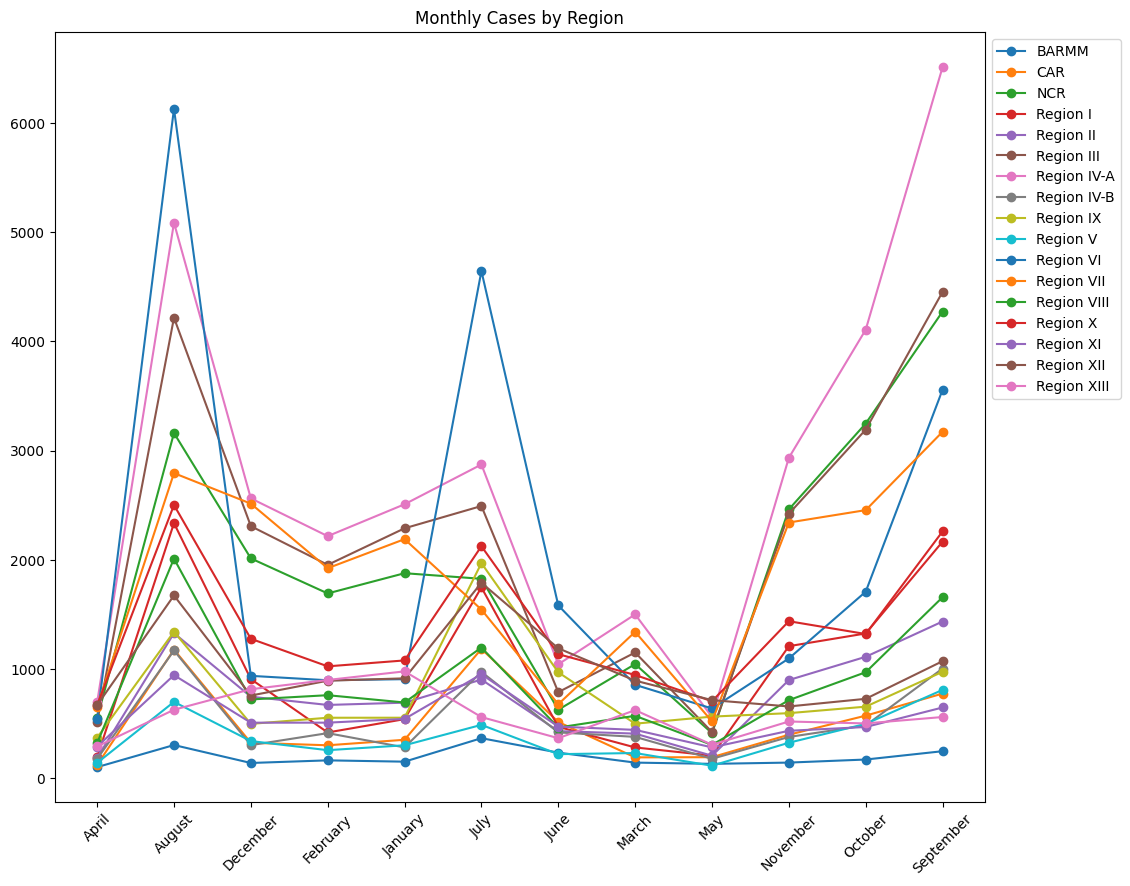

In [34]:
monthly_pattern = dengue.groupby(['Month', 'Region'])['Dengue_Cases'].mean().unstack()
count = 0

for region in monthly_pattern.columns:
    plt.plot(monthly_pattern.index, monthly_pattern[region], label=region, marker='o')
    count += 1
    if count == 17:
        break
plt.title('Monthly Cases by Region')
plt.xticks(rotation=45)
plt.legend()
plt.gcf().set_size_inches(12,10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# #13 Yearly trend of dengue cases by region
### INSIGHT: Seemingly that in the Year 2019, there is an elevation of Dengue Cases according to the dataset record

In [35]:
dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Year,,,,,,,,,,,,,,,,,
2016,2191,9164,13002,8281,3891,20989,24282,3999,7215,2532,26170,29395,5388,17680,12137,16013,7215
2017,485,4045,26103,8236,5310,25200,22421,2770,4274,3225,9283,15940,3916,6679,3667,9613,2988
2018,2460,7584,29200,15511,17678,31726,30410,8019,6161,3548,17582,21889,10976,23497,6316,9173,9053
2019,5393,8808,40478,19867,16634,37158,76195,10984,27447,11141,60357,31053,26871,28356,8466,20640,12054
2020,1008,981,7183,7171,1628,15991,9721,5077,2684,1721,4131,12406,4832,6225,1936,4363,3983


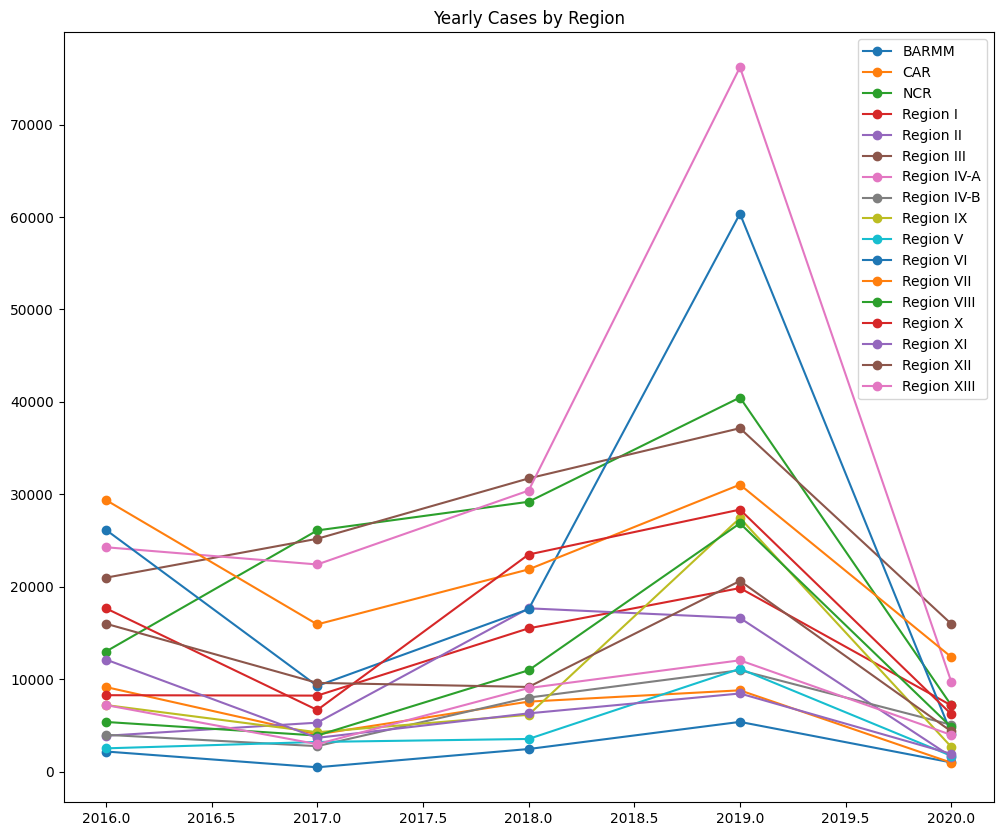

In [36]:
yearly_trend = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()
count = 0
for region in yearly_trend.columns:
    plt.plot(yearly_trend.index, yearly_trend[region], label=region, marker='o')
    count += 1
    if count == 17:
        break
plt.title('Yearly Cases by Region')
plt.legend()
plt.gcf().set_size_inches(12,10)
plt.show()

# #14 Case fatality rate by region and year
### INSIGHT: Fatality rate in NCR by the year 2016 reached an alarming >20%

In [37]:
(dengue.groupby(['Region', 'Year'])['Dengue_Deaths'].sum() / dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum()).unstack()

Year,2016,2017,2018,2019,2020
Region,,,,,
BARMM,0.110908,0.004124,0.013415,0.005748,0.022817
CAR,0.096901,0.002967,0.001055,0.003065,0.074414
NCR,0.229734,0.006436,0.006164,0.004694,0.067242
Region I,0.002536,0.002793,0.003417,0.002114,0.002510
Region II,0.002827,0.006403,0.003507,0.004629,0.005528
Region III,0.003097,0.003214,0.002679,0.005221,0.003565
Region IV-A,0.004448,0.004906,0.005163,0.003176,0.003600
Region IV-B,0.004501,0.004332,0.006360,0.002367,0.004530
Region IX,0.005683,0.073234,0.008765,0.003935,0.005961


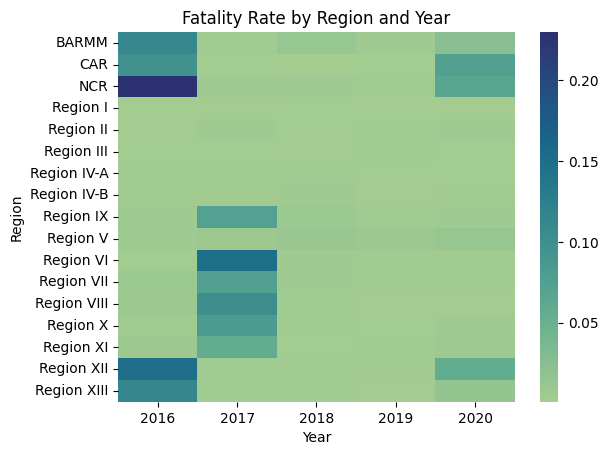

In [38]:
fatality_rate = (dengue.groupby(['Region', 'Year'])['Dengue_Deaths'].sum() / 
                dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum()).unstack()
sns.heatmap(fatality_rate, cmap='crest')
plt.title('Fatality Rate by Region and Year')
plt.show()

# #15 ANOVA test for dengue cases across different regions

In [39]:
regions = [dengue[dengue['Region']==r]['Dengue_Cases'] for r in dengue['Region'].unique()]
f_oneway(*regions)

F_onewayResult(statistic=14.371108842018119, pvalue=1.5512378548439148e-35)

# #16 How many dengue cases in Region I during 2019?
### INSIGHT: There are all 19867 dengue cases in Region I during 2019 and has the highest peak during the month of September

In [40]:
dengue[(dengue['Region']=='Region I') & (dengue['Year']==2019)]['Dengue_Cases'].sum()

19867

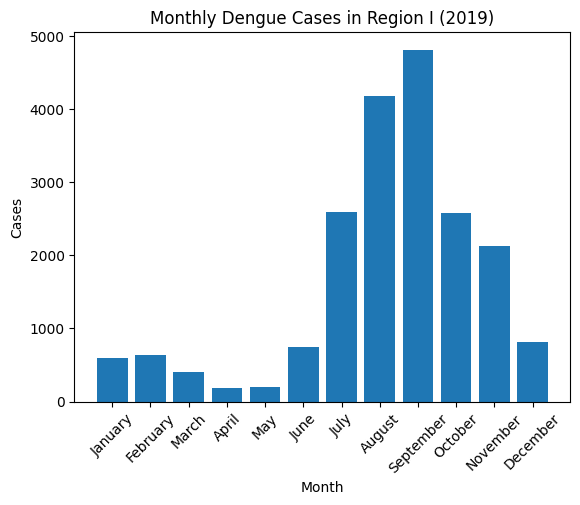

In [41]:
region1_2016 = dengue[(dengue['Region']=='Region I') & (dengue['Year']==2019)]
plt.bar(region1_2016['Month'], region1_2016['Dengue_Cases'])
plt.title('Monthly Dengue Cases in Region I (2019)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()

# #17 Months with zero dengue deaths in Region II
### INSIGHT: Months showed in the graph had no deaths in Region II

In [42]:
dengue[(dengue['Region']=='Region II') & (dengue['Dengue_Deaths']==0)]['Month'].unique()

['March', 'April', 'May', 'August', 'December', 'June', 'February', 'July', 'November']
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

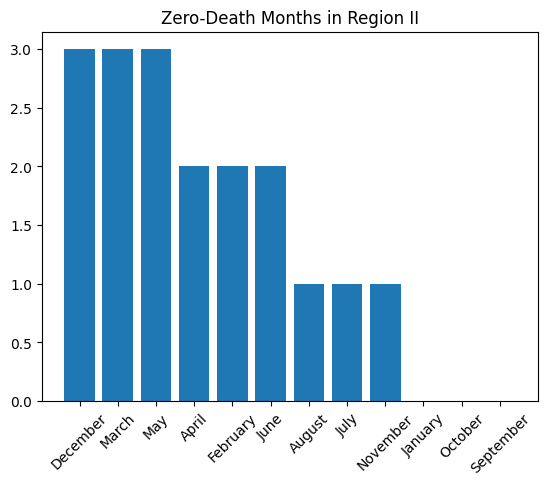

In [43]:
zero_months = dengue[(dengue['Region']=='Region II') & (dengue['Dengue_Deaths']==0)]['Month'].value_counts()
x = zero_months.index
y = zero_months.values
plt.bar(x,y)
plt.title('Zero-Death Months in Region II')
plt.xticks(rotation=45)
plt.show()

# #18 Year with the highest dengue cases in Region III
### INSIGHT: 2019 was the worst year for Region III

In [44]:
dengue[dengue['Region']=='Region III'].groupby('Year')['Dengue_Cases'].sum().idxmax()

2019

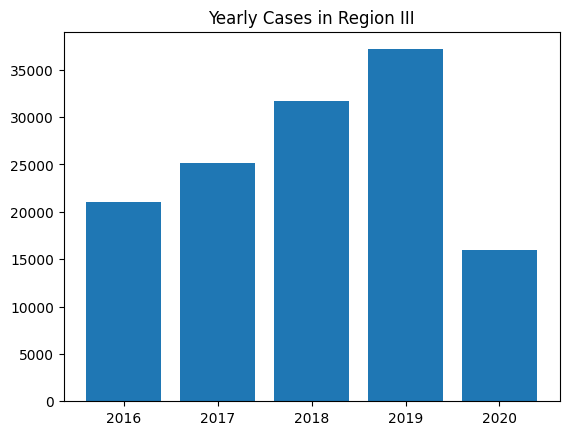

In [45]:
x = dengue[dengue['Region']=='Region III'].groupby('Year')['Dengue_Cases'].sum().index
y = dengue[dengue['Region']=='Region III'].groupby('Year')['Dengue_Cases'].sum().values
plt.bar(x,y)
plt.title('Yearly Cases in Region III')
plt.show()

# #19 Average dengue cases in May across all years
### INSIGHT: 2019 got the highest average of dengue cases across all years and year 2020 got the lowest average of dengue cases across all years

In [46]:
dengue[dengue['Month']=='May']['Dengue_Cases'].mean()

381.0235294117647

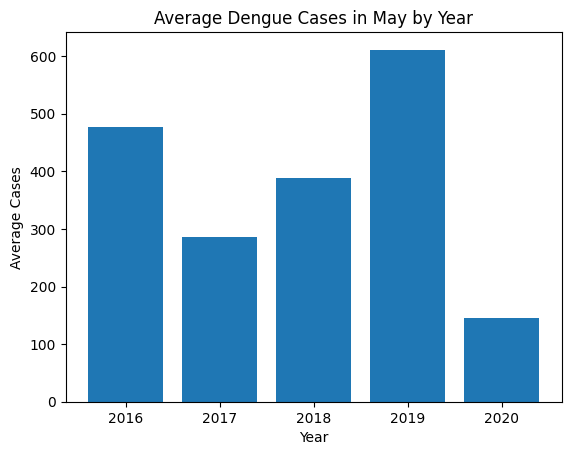

In [47]:
may_avg = dengue[dengue['Month']=='May'].groupby('Year')['Dengue_Cases'].mean()
plt.bar(may_avg.index.astype(str), may_avg.values)
plt.title('Average Dengue Cases in May by Year')
plt.xlabel('Year')
plt.ylabel('Average Cases')
plt.show()

# #20 Percentage of months with more than 500 dengue cases
### INSIGHT: 54% of months had severe outbreaks (>500 cases) showing that dengue is an overall serious threat

In [48]:
np.round((len(dengue[dengue['Dengue_Cases']>500]) / len(dengue)) * 100,2)

54.31

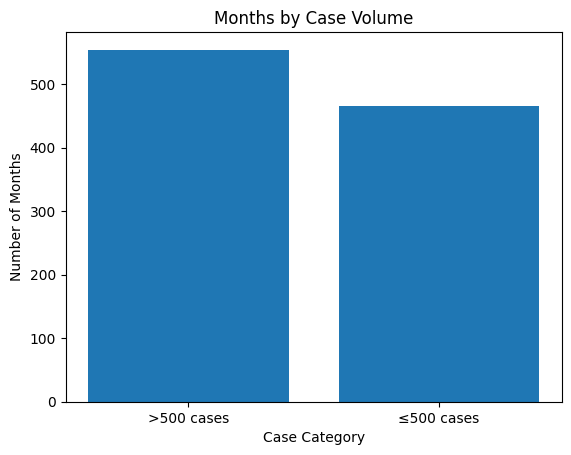

In [49]:
high_cases = pd.DataFrame({
    'Count': [
        len(dengue[dengue['Dengue_Cases']>500]),
        len(dengue[dengue['Dengue_Cases']<=500])
    ],
    'Category': ['>500 cases', '≤500 cases']
})
plt.bar(high_cases['Category'], high_cases['Count'])
plt.title('Months by Case Volume')
plt.xlabel('Case Category')
plt.ylabel('Number of Months')
plt.show()